In [1]:
import random
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from data_analysis_common_utils import summarize_sentences, load_filelist_as_df
from src.text.cleaners import remove_stress_marks

plt.style.use("default")
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [2]:
train_df = load_filelist_as_df("../files/studio_stress_train.txt")
test_df = load_filelist_as_df("../files/studio_stress_test.txt")

train_df["sentence"] = train_df["sentence"].str.strip().apply(remove_stress_marks)
test_df["sentence"] = test_df["sentence"].str.strip().apply(remove_stress_marks)

                                 filepath  \
0  files/studio_clips/07-SKYRIUS_0579.wav   
1  files/studio_clips/01-SKYRIUS_0150.wav   
2  files/studio_clips/02-SKYRIUS_0118.wav   
3  files/studio_clips/01-SKYRIUS_0013.wav   
4  files/studio_clips/01-SKYRIUS_0094.wav   

                                            sentence  
0                  Kaip jis gali užpildyti gyvenimą?  
1                   O aplink žaliuoja žydinti pieva.  
2                       Linkteliu galva, ir atsakau:  
3  Bet svarbiausia - gavome ir po dvigubą davinį ...  
4  Mes buvome nusiteikę karingai, ir tikriausiai ...  


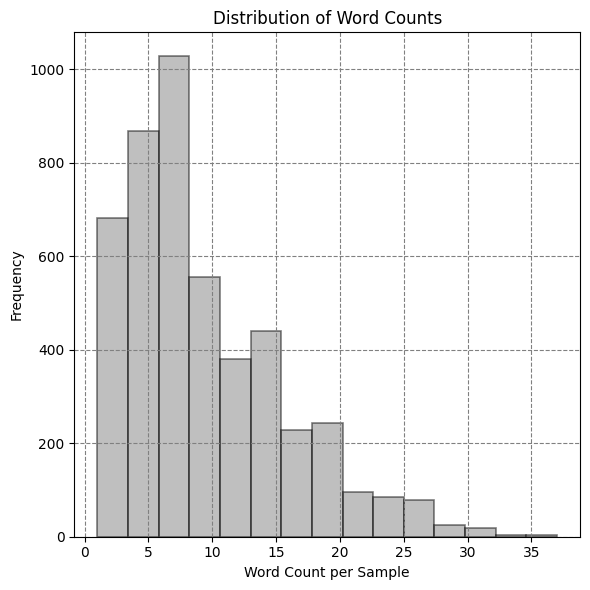


    Word statistics (Per Text):
        Total:       44457
        Unique:      12181
        Mean:         9.38
        STD:          6.17
        Median:       8.00
        Min:             1
        Max:            37
    


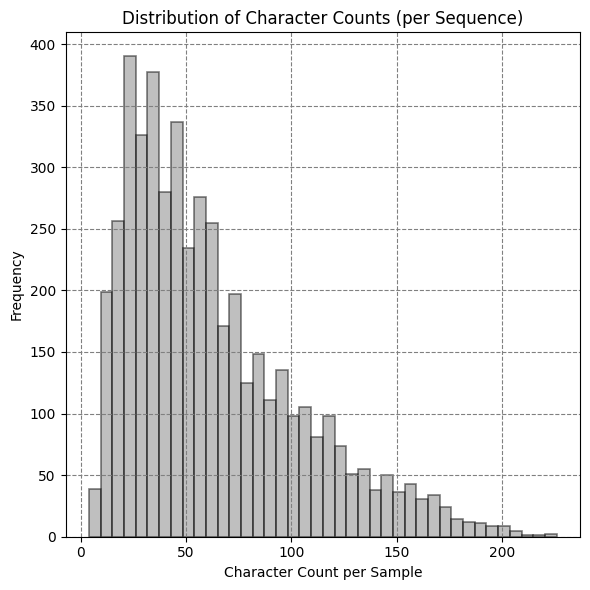


    Character statistics (Per Text):
        Total:      297072
        Mean:        62.70
        STD:         40.96
        Median:      52.00
        Min:             4
        Max:           226
    


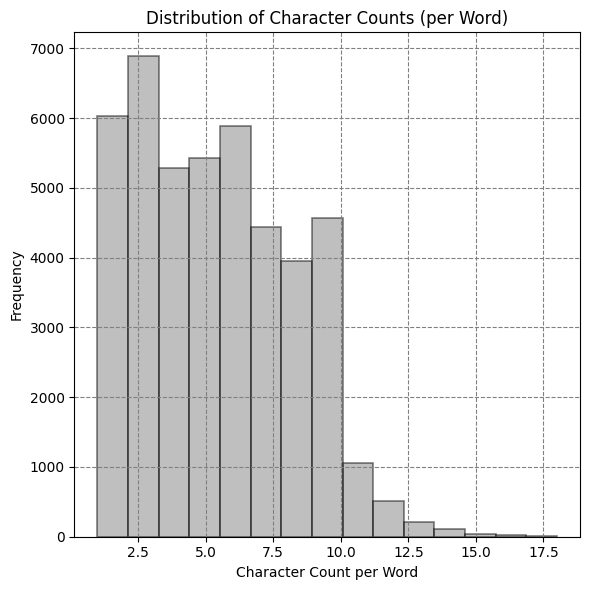


    Character statistics (Per Word):
        Total:      244412
        Mean:         5.50
        STD:          2.71
        Median:       5.00
        Min:             1
        Max:            18
    


In [3]:
# TRAINING SET
print(train_df.head())
summarize_sentences(train_df)

                                 filepath  \
0  files/studio_clips/06-SKYRIUS_0466.wav   
1  files/studio_clips/11-SKYRIUS_0180.wav   
2  files/studio_clips/10-SKYRIUS_0470.wav   
3  files/studio_clips/04-SKYRIUS_0437.wav   
4  files/studio_clips/09-SKYRIUS_0308.wav   

                                            sentence  
0  Kodėl taip visi gaudo tuos varinius žiedus, ti...  
1  Užpakaly ėjęs liepsnosvaidininkas sužeistas, j...  
2             Kas turi leidimą, gali daryti ką nori.  
3                                  Jo akys pagyvėja.  
4                                  Viena po kitos...  


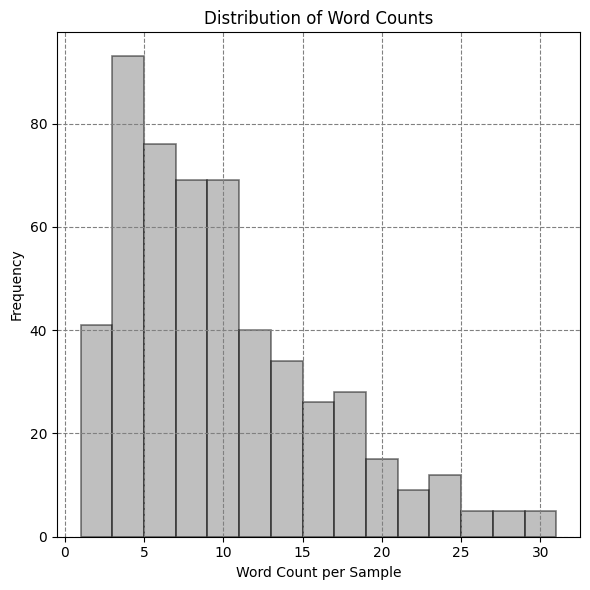


    Word statistics (Per Text):
        Total:        4977
        Unique:       2506
        Mean:         9.44
        STD:          6.27
        Median:       8.00
        Min:             1
        Max:            31
    


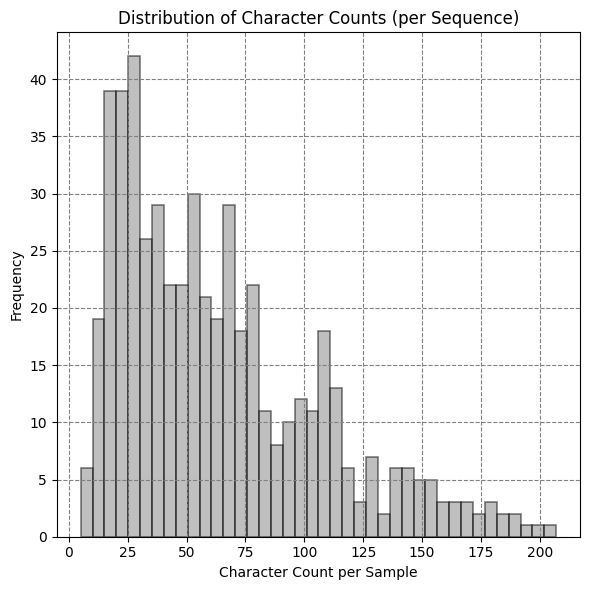


    Character statistics (Per Text):
        Total:       33474
        Mean:        63.52
        STD:         42.35
        Median:      53.00
        Min:             5
        Max:           207
    


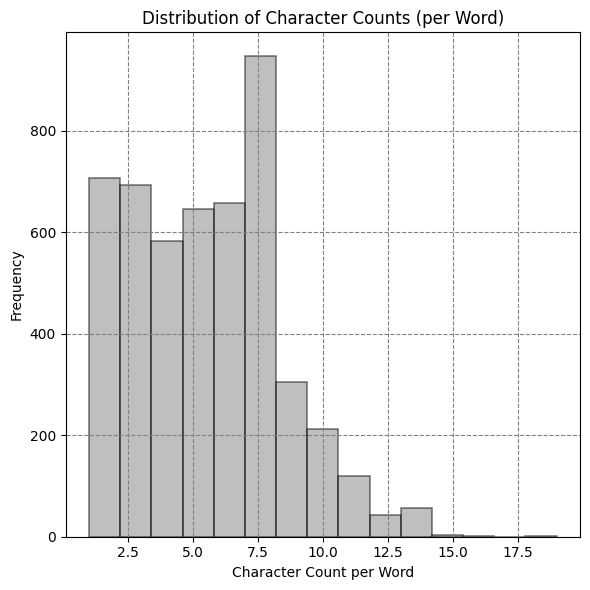


    Character statistics (Per Word):
        Total:       27536
        Mean:         5.53
        STD:          2.73
        Median:       5.00
        Min:             1
        Max:            19
    


In [4]:
# TESTING SET
print(test_df.head())
summarize_sentences(test_df)

In [5]:
def save_filelist(_df: pd.DataFrame, out_path: str):
    _df.to_csv(
        out_path,
        sep="|",
        index=False,
        header=False,
        columns=["filepath", "sentence"]
    )
    print(f"Saved filelist to {out_path}")


save_filelist(train_df, "../files/studio_plain_train.txt")
save_filelist(test_df, "../files/studio_plain_test.txt")

Saved filelist to ../files/studio_plain_train.txt
Saved filelist to ../files/studio_plain_test.txt
